# Exploration (5)

##  SETUP

In [6]:
import os
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sea
# data directory
DATA_DIR = os.path.join('../', 'Data')

In [7]:
DATA_DIR

'../Data'

In [8]:
pwd

'/Users/tsando/code/rtb/ucl/rtb/i-ACR'

##  Load data

In [10]:
# load data
train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
validation = pd.read_csv(os.path.join(DATA_DIR, 'validation.csv'))

In [11]:
len(train)

2430981

In [12]:
len(train)/len(validation)

7.998621370403883

In [13]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [14]:
#Only select chinese and software

train=train[train['advertiser']==(1458 or 3358)] #chinese ecommerce 

In [15]:
train.shape

(492353, 25)

In [16]:
train.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
5,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1.0,...,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110"
7,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111"
8,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3.0,...,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110"
12,0,2,21,83be02e32b55209c39ae3f0b76f0149f73585910,f39780ed2b506f3683ada7995ce789b95e2bf85b,windows_ie,114.139.26.*,298,301,1.0,...,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,NaN


In [17]:
temp = list(train.columns)
temp.sort()
temp

['IP',
 'adexchange',
 'advertiser',
 'bidid',
 'bidprice',
 'city',
 'click',
 'creative',
 'domain',
 'hour',
 'keypage',
 'payprice',
 'region',
 'slotformat',
 'slotheight',
 'slotid',
 'slotprice',
 'slotvisibility',
 'slotwidth',
 'url',
 'urlid',
 'useragent',
 'userid',
 'usertag',
 'weekday']

In [18]:
original_list = ['IP',
 'adexchange',
 'advertiser',
 'bidid',
 'bidprice',
 'city',
 'click',
 'creative',
 'domain',
 'hour',
 'ipinyouid',
 'keypage',
 'logtype',
 'payprice',
 'region',
 'slotformat',
 'slotheight',
 'slotid',
 'slotprice',
 'slotvisibility',
 'slotwidth',
 'timestamp',
 'url',
 'urlid',
 'useragent',
 'usertag',
 'weekday']

In [19]:
# In campaing 1458 but not in alex's dataset 
[x for x in original_list if x not in temp]

['ipinyouid', 'logtype', 'timestamp']

In [20]:
# In alex's dataset but not in campaign 1458
[x for x in temp if x not in original_list]

['userid']

## Define performance metrics

- **Click-through rate** - This is the most important metric (the others are just for discussion and comparison)

- **Clicks** - Number of clicked bids

- **Spend** - Total money paid

- **Average CPM** - Cost per mile

- **Average CPC** - Cost per click

## Exploration


In [23]:
# this just check missing values as below
missing = []
for col in train.columns:
    if len(train.loc[train[col].isnull()])>0:
        missing.append(col)
missing

['domain', 'url', 'urlid', 'usertag']

In [24]:
train.isnull().sum().sort_values(ascending=False)

urlid             492353
usertag            64019
domain             27174
url                11004
weekday                0
hour                   0
bidid                  0
userid                 0
useragent              0
IP                     0
region                 0
city                   0
adexchange             0
keypage                0
payprice               0
advertiser             0
slotid                 0
slotwidth              0
slotheight             0
slotvisibility         0
slotformat             0
slotprice              0
creative               0
bidprice               0
click                  0
dtype: int64

In [25]:
# i think os and browser are dummy columns
train[['os', 'browser']]

KeyError: "['os' 'browser'] not in index"

In [26]:
train.head().useragent.map(lambda x: x.split("_"))

3     [windows, ie]
5     [windows, ie]
7     [windows, ie]
8     [windows, ie]
12    [windows, ie]
Name: useragent, dtype: object

In [27]:
#OS AND BROWSER USAGE

train["os"],train["browser"] = zip(*train.useragent.map(lambda x: x.split("_")))


In [28]:
for name in train.os.unique():
    print(name + ': ' + str(train.os.value_counts()[name]/len(train)) + '%')

windows: 0.9702896092843956%
mac: 0.021035720306365555%
android: 0.006468935905742425%
other: 0.0015009556151785407%
linux: 0.0005443249050985777%
ios: 0.00016045398321935683%


In [29]:
for name in train.browser.unique():
    print(name + ': ' + str(train.browser.value_counts()[name]/len(train)) + '%')

ie: 0.6506876164053027%
chrome: 0.29995755078165465%
other: 0.009476940325335683%
safari: 0.023468933874679347%
maxthon: 0.0025043007760692025%
firefox: 0.007382914291169141%
theworld: 0.005585423466496599%
opera: 0.0009261647638990724%
sogou: 1.015531539363018e-05%


In [30]:
os_ctr = []
for name in train.os.unique():
    os_ctr.append(len(train.loc[(train.click==1) & (train.os==name)])/len(train.loc[train.os==name]))
os_ctr

[0.0007075200167460359,
 0.00308969778893502,
 0.004395604395604396,
 0.0,
 0.0,
 0.012658227848101266]

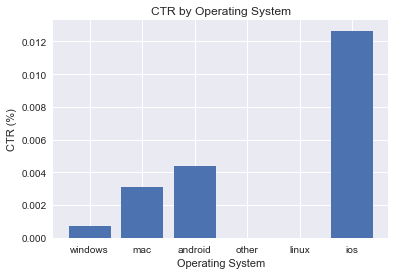

In [45]:
plt.bar(np.arange(len(train.os.unique())), os_ctr, tick_label=train.os.unique().tolist(), align='center')
plt.title('CTR by Operating System')
plt.ylabel('CTR (%)')
plt.xlabel('Operating System')
plt.show()

In [33]:
browser_ctr = []
for name in train.browser.unique():
    browser_ctr.append(len(train.loc[(train.click==1) & (train.browser==name)])/len(train.loc[train.browser==name]))

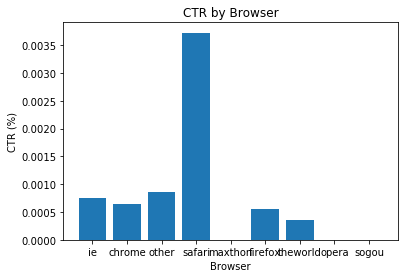

In [34]:
plt.bar(np.arange(len(train.browser.unique())), browser_ctr, tick_label=train.browser.unique().tolist(), align='center')
plt.title('CTR by Browser')
plt.ylabel('CTR (%)')
plt.xlabel('Browser')
plt.show()

In [35]:
for name in train.useragent.unique():
    print(name + ': ' + str(train.useragent.value_counts()[name]*100/len(train)) + '%')


windows_ie: 65.067746109%
windows_chrome: 29.893389499%
windows_other: 0.469784890109%
mac_other: 0.287801638255%
mac_chrome: 0.0501672580445%
mac_safari: 1.74468318463%
windows_maxthon: 0.247789695605%
windows_firefox: 0.707825482936%
android_safari: 0.568697662043%
windows_theworld: 0.55854234665%
windows_opera: 0.0714934203712%
android_other: 0.0448864940398%
other_other: 0.142174415511%
linux_safari: 0.00406212615745%
linux_chrome: 0.0371684543407%
android_chrome: 0.0142174415511%
mac_firefox: 0.0188888866322%
ios_safari: 0.0152329730904%
windows_safari: 0.0119832721645%
android_opera: 0.0164516109377%
linux_firefox: 0.0107646343172%
mac_maxthon: 0.00101553153936%
other_ie: 0.00101553153936%
other_opera: 0.00385901984958%
linux_other: 0.0022341693866%
mac_opera: 0.000609318923618%
windows_sogou: 0.000406212615745%
android_maxthon: 0.00162485046298%
android_firefox: 0.00081242523149%
android_sogou: 0.000203106307873%
ios_other: 0.00081242523149%
other_safari: 0.0022341693866%
other_

# Hour & Weekday Analysis


In [36]:
week_ctr = []
for name in sorted(train.weekday.unique()):
    week_ctr.append(len(train.loc[(train.click==1) & (train.weekday==name)])/len(train.loc[train.weekday==name]))

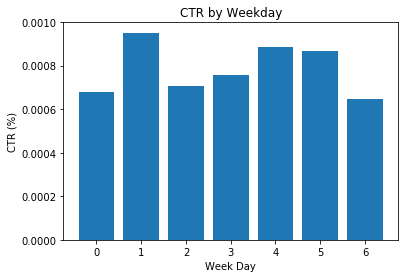

In [37]:
plt.bar(np.arange(len(train.weekday.unique())), week_ctr, tick_label=sorted(train.weekday.unique().tolist()), align='center')
plt.title('CTR by Weekday')
plt.ylabel('CTR (%)')
plt.xlabel('Week Day')
plt.show()

In [38]:
hour_ctr = []
for name in sorted(train.hour.unique()):
    hour_ctr.append(len(train.loc[(train.click==1) & (train.hour==name)])/len(train.loc[train.hour==name]))

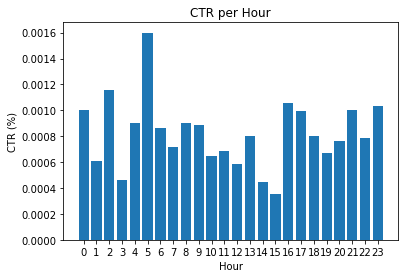

In [39]:
plt.bar(np.arange(1,25), hour_ctr, tick_label=sorted(train.hour.unique().tolist()), align='center')
plt.title('CTR per Hour')
plt.ylabel('CTR (%)')
plt.xlabel('Hour')
plt.show()


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [41]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag',
       'os', 'browser'],
      dtype='object')

In [41]:
train['payprice']=np.log(train['payprice']) #log payprice

In [31]:
train["log_payprice"]=np.log(train['payprice'])

In [32]:
train["log_bidprice"]=np.log(train['bidprice'])

In [35]:
import seaborn as sns

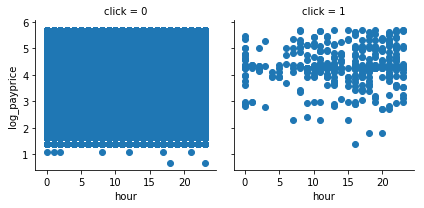

In [36]:
g = sns.FacetGrid(train, col = "click")
g = g.map(plt.scatter, "hour", "log_payprice")
g

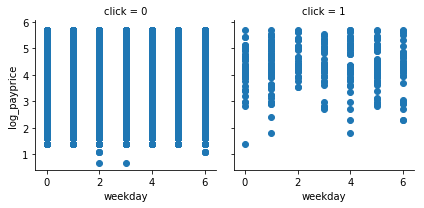

In [37]:
g = sns.FacetGrid(train, col = "click")
g = g.map(plt.scatter, "weekday", "log_payprice")
g

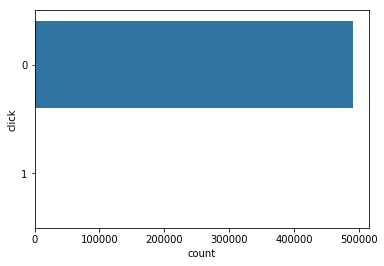

In [42]:
sns.countplot(data = train, y= "click");


In [ ]:
train['click'].sum()

In [31]:
train['click'].shape[0]-1793


2429188

In [32]:
1793*100/train['click'].shape[0]

0.07375623256619447

0.074% chance of data is a click through

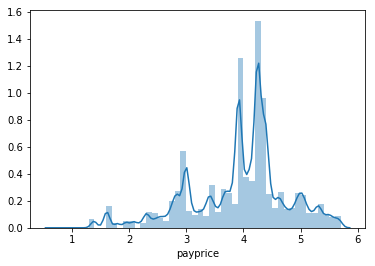

In [43]:
sea.distplot(train['payprice'])

In [71]:
set1=train[train['click']==1]
set2=train[train['click']==0][:385]

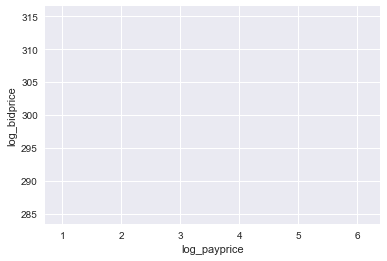

In [72]:
ax = sns.kdeplot(set1.log_payprice, set1.log_bidprice,
                  cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(set2.log_payprice, set2.log_bidprice,
                  cmap="Blues", shade=True, shade_lowest=False)


In [73]:
slotwidth', 'slotheight

SyntaxError: invalid syntax (<ipython-input-73-d88a6da7305c>, line 1)

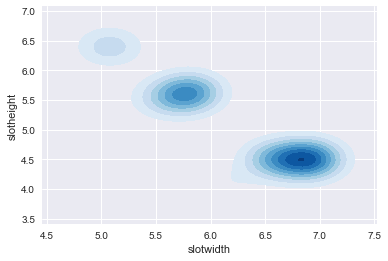

In [77]:
ax = sns.kdeplot(np.log(set2.slotwidth), np.log(set2.slotheight),
                  cmap="Blues", shade=True, shade_lowest=False)

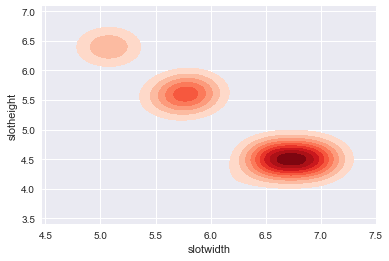

In [78]:
ax = sns.kdeplot(np.log(set1.slotwidth), np.log(set1.slotheight),
                  cmap="Reds", shade=True, shade_lowest=False)